In [73]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

In [74]:
data = pd.read_csv('train.csv')

In [75]:
data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,2273000.00
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,3600000.00
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,144.00,166.00,48551.00,nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,1200000.00
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,63.00,67.00,53666.00,19.30,-99.69,2012-03-09 00:00:00,0.00,0.00,0.00,1.00,1.00,650000.00
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,nan,nan,2016-06-07 00:00:00,0.00,0.00,0.00,0.00,0.00,1150000.00


In [76]:
data['fecha'] = pd.to_datetime(data['fecha'])

In [77]:
data['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

# ¿Es mayor la correlacion metros cubiertos-precio cubiertos de una casa vs la de un departamento?

## metros-cubiertos vs precio de casas

In [78]:
data_houses = pd.DataFrame()
data_houses = data[ data['tipodepropiedad'] == 'Casa' ]
data_houses = data_houses.loc[:, ['precio', 'metroscubiertos']]
data_houses.head()

,precio,metroscubiertos
2,1200000.00,144.00
3,650000.00,63.00
6,1150000.00,140.00
7,4200000.00,293.00
10,488000.00,100.00


In [79]:
data_houses.shape

(141717, 2)

In [80]:
data_houses.isnull().sum().sum()

6532

In [81]:
(data_houses.isnull().sum().sum()) / (data_houses.shape[0]) * 100

4.609185912769815

In [82]:
data_houses.dropna(inplace = True)

In [83]:
data_houses.corr()

,precio,metroscubiertos
precio,1.00,0.75
metroscubiertos,0.75,1.00


## metros-cubiertos vs precio de departamentos

In [84]:
data_flat = pd.DataFrame()
data_flat = data[data['tipodepropiedad'] == 'Apartamento']
data_flat = data_flat.loc[:, ['precio', 'metroscubiertos']]
data_flat.head()

,precio,metroscubiertos
0,2273000.00,80.00
4,1150000.00,95.00
5,1100000.00,75.00
8,310000.00,58.00
11,7200000.00,256.00


In [85]:
data_flat.shape

(57341, 2)

In [86]:
data_flat.isnull().sum().sum()

823

In [87]:
(data_flat.isnull().sum().sum()) / (data_flat.shape[0]) * 100

1.4352731902129368

In [88]:
data_flat = data_flat.dropna()

In [89]:
data_flat.corr()

,precio,metroscubiertos
precio,1.00,0.75
metroscubiertos,0.75,1.00


Como conclusion al parecer la corrrelacion es la misma en caso de departamentos y casas.

## Metros-cubiertos vs precio de Terreno

In [90]:
data_land = pd.DataFrame()
data_land = data[ data['tipodepropiedad'] == 'Terreno' ]
data_land = data_land.loc[:, ['precio', 'metrostotales']]
#Uso metrostotales porque metroscubiertos tiene mas NULLs en este caso
data_land.head()

,precio,metrostotales
9,6200000.00,nan
18,794078.00,164.00
20,490000.00,105.00
57,1439000.00,323.00
125,720000.00,400.00


In [91]:
data_land.shape

(9945, 2)

In [92]:
(data_land.isnull().sum().sum()) / (data_land.shape[0]) * 100

12.770236299648063

In [93]:
data_land.dropna(inplace = True)

In [94]:
data_land.corr()

,precio,metrostotales
precio,1.00,0.25
metrostotales,0.25,1.00


Casi no hay correlacion en este caso... (Significativamente menos)

## Correlacion de cada grupo

In [95]:
df = data.dropna(subset = ['precio']).groupby(['tipodepropiedad'])['precio', 'metroscubiertos', 'metrostotales'].corr().reset_index()
df = df[ df['level_1'] == 'precio']
df

,tipodepropiedad,level_1,precio,metroscubiertos,metrostotales
0,Apartamento,precio,1.00,0.75,0.73
3,Bodega comercial,precio,1.00,0.20,0.32
6,Casa,precio,1.00,0.75,0.62
9,Casa en condominio,precio,1.00,0.79,0.62
12,Casa uso de suelo,precio,1.00,0.51,0.36
15,Departamento Compartido,precio,1.00,0.71,0.64
18,Duplex,precio,1.00,0.79,0.68
21,Edificio,precio,1.00,0.28,0.38
24,Garage,precio,nan,nan,nan
27,Hospedaje,precio,nan,nan,nan


In [96]:
data['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

Se eliminan los tipos de propiedades con menos de 100 apariciones porque son muy pocos.

In [97]:
df = df.drop(labels = [27, 24, 42, 30, 66, 45] )
df.sort_values(['metroscubiertos', 'metrostotales'], ascending = False, inplace = True)
df = df.set_index('tipodepropiedad')

## Comparamos estas correlaciones en una grafica:

Text(0, 0.5, 'Tipo de propiedad')

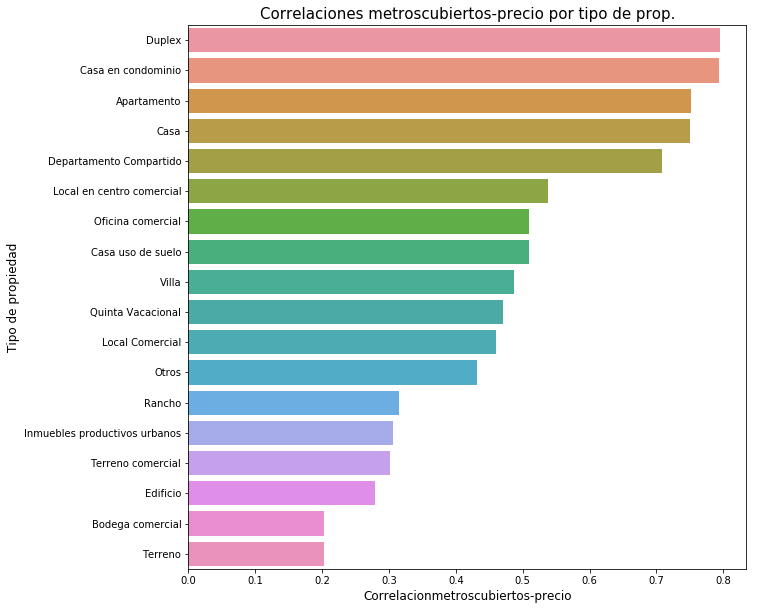

In [98]:
plt.figure(figsize=(10,10))
g = sns.barplot(x = df['metroscubiertos'], y=df.index)
g.set_title("Correlaciones metroscubiertos-precio por tipo de prop.", fontsize=15)
g.set_xlabel("Correlacionmetroscubiertos-precio", fontsize=12)
g.set_ylabel("Tipo de propiedad", fontsize=12)


### La misma grafica pero esta vez incluyendo a su vez metrostotales

<Figure size 720x720 with 0 Axes>

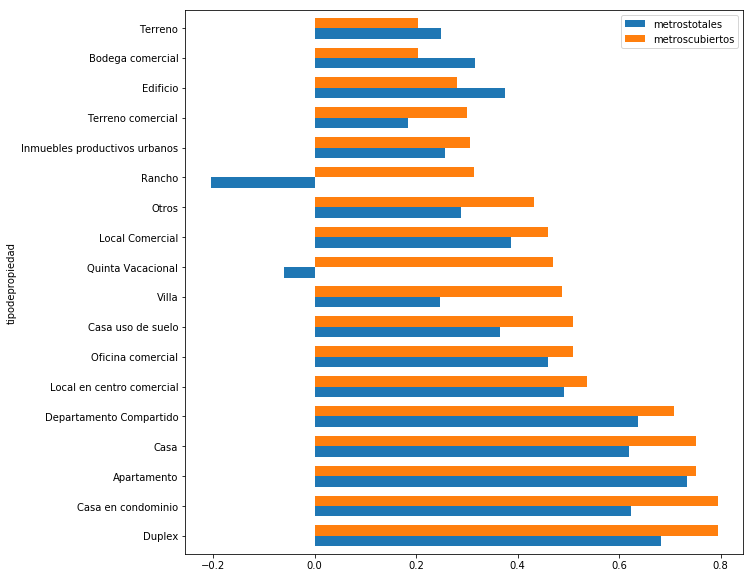

In [99]:
df2 = df.reset_index()
plt.figure(figsize = (10, 10))
df2.plot.barh(x='tipodepropiedad', y= ['metrostotales', 'metroscubiertos'], rot=0, figsize = (10, 10), width = 0.7)

### Como conlcusion podemos ver que segun el tipo de propiedad que sea la relacion metros-precio adquiere mayor o menor importancia.

# Busqueda de relacion entre precio y antiguedad

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [101]:
antiguedad = data.loc[: , ['antiguedad','precio']]
antiguedad.dropna(inplace = True)
antiguedad.head()

,antiguedad,precio
1,10.00,3600000.00
2,5.00,1200000.00
3,1.00,650000.00
4,10.00,1150000.00
5,5.00,1100000.00


In [102]:
antiguedad.shape

(196445, 2)

In [103]:
antiguedad.corr()

,antiguedad,precio
antiguedad,1.00,0.07
precio,0.07,1.00


La antiguedad pareciera no importar. Quizas si se especifica el tipo de propiedad sí...

/home/manu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Precio')

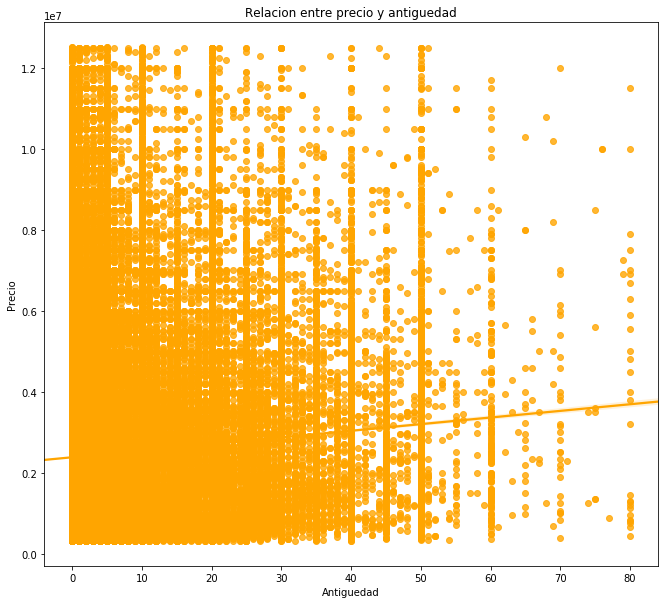

In [104]:
plt.figure(figsize = (11, 10))
g = sns.regplot(x="antiguedad", y="precio",
                    data=antiguedad, color="orange")

g.set_title("Relacion entre precio y antiguedad")
g.set_xlabel("Antiguedad")
g.set_ylabel("Precio")

En el grafico se ve que no hay relacion alguna entre precio y antiguedad

Se analizara esta misma relacion teniendo en cuenta el tipo de propiedad

# Precio promedio por antiguedad

In [105]:
df = data
df['n'] = 1
df = df.groupby(['antiguedad']).filter(lambda x: x['n'].sum() >= 200)
df['antiguedad'].value_counts()

0.00     50335
5.00     33268
10.00    28844
20.00    19904
1.00     12353
4.00      7944
3.00      5616
2.00      5059
15.00     3965
6.00      3169
30.00     3055
8.00      2418
25.00     2297
7.00      2046
12.00     1492
11.00     1434
40.00     1347
50.00     1193
9.00      1065
35.00      938
18.00      908
21.00      742
16.00      700
14.00      616
13.00      577
17.00      529
22.00      448
28.00      396
26.00      369
45.00      329
27.00      319
19.00      311
23.00      305
24.00      270
Name: antiguedad, dtype: int64

In [106]:
df = df.astype({'antiguedad':'category'})
df = df.groupby(by = "antiguedad").agg({'precio' : 'mean'}).reset_index()
df.head()

,antiguedad,precio
0,0.00,2478478.97
1,1.00,2635362.52
2,2.00,2790816.37
3,3.00,2616412.59
4,4.00,2562077.38


Text(0, 0.5, 'Antiguedad (años)')

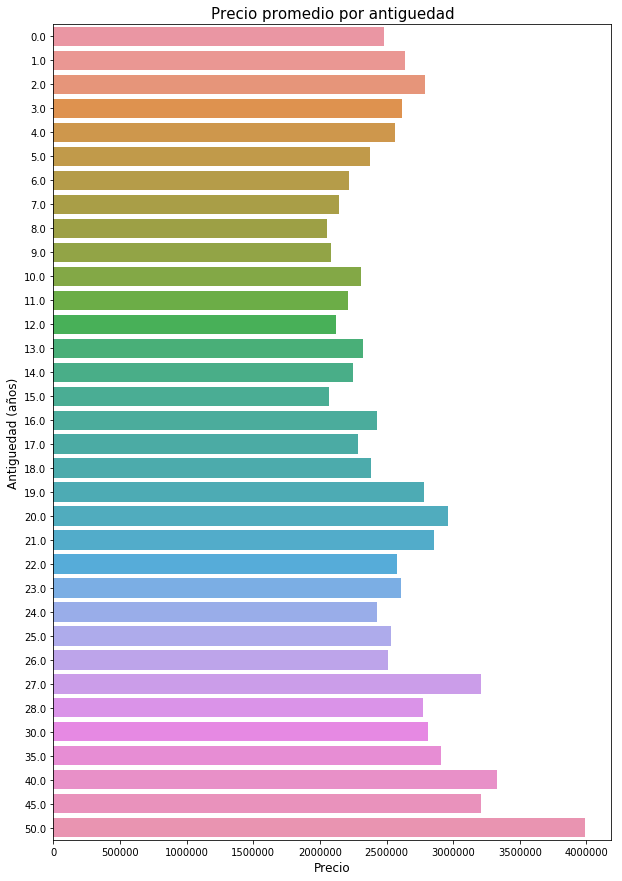

In [107]:
plt.figure(figsize=(10,15))
g = sns.barplot(x = df['precio'], y = df['antiguedad'])
g.set_title("Precio promedio por antiguedad", fontsize=15)
g.set_xlabel("Precio", fontsize=12)
g.set_ylabel("Antiguedad (años)", fontsize=12)

Como se ve, el promedio no varia mucho entre las propiedades de distinta antiguedad. Esto refuerza la idea de que la antiguedad de la propiedad no aumenta el precio. Exceptuando el caso de 50 años

### Para el caso de casas

In [108]:
data_casa = data[data['tipodepropiedad'] == 'Casa']
data_casa.shape

(141717, 24)

In [109]:
data_casa_antiguedad = data_casa.loc[:, ['antiguedad', 'precio']]
data_casa_antiguedad.dropna(inplace = True)
data_casa_antiguedad.corr()

,antiguedad,precio
antiguedad,1.00,0.16
precio,0.16,1.00


Text(0, 0.5, 'Precio de casa')

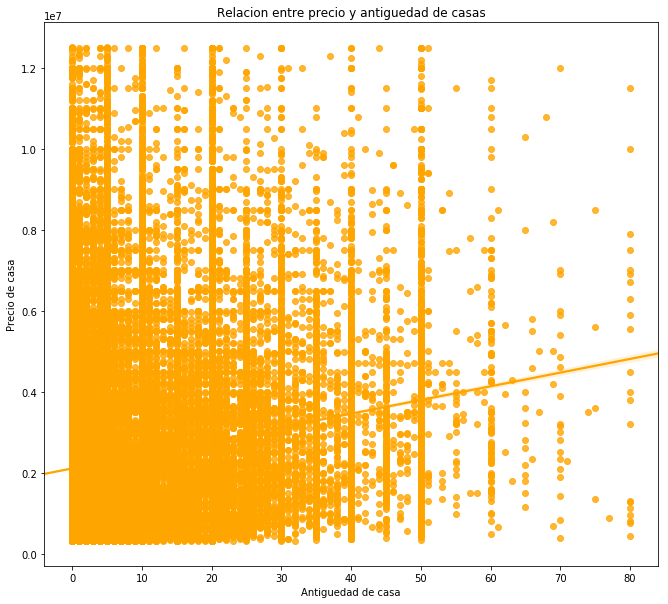

In [110]:
plt.figure(figsize = (11, 10))
g = sns.regplot(x="antiguedad", y="precio",
                    data=data_casa_antiguedad, color="orange")

g.set_title("Relacion entre precio y antiguedad de casas" )
g.set_xlabel("Antiguedad de casa")
g.set_ylabel("Precio de casa")

Tanto el grafico como los valores obtenidos son practicamente iguales

### Para todos los tipos de propiedades

In [111]:
df = data.dropna(subset = ['antiguedad']).groupby(['tipodepropiedad'])['antiguedad', 'precio'].corr().reset_index()
df = df[ df['level_1'] == 'antiguedad']
df

,tipodepropiedad,level_1,antiguedad,precio
0,Apartamento,antiguedad,1.00,-0.18
2,Bodega comercial,antiguedad,1.00,0.18
4,Casa,antiguedad,1.00,0.16
6,Casa en condominio,antiguedad,1.00,0.11
8,Casa uso de suelo,antiguedad,1.00,0.22
10,Departamento Compartido,antiguedad,1.00,-0.30
12,Duplex,antiguedad,1.00,0.18
14,Edificio,antiguedad,1.00,0.10
16,Huerta,antiguedad,1.00,0.27
18,Inmuebles productivos urbanos,antiguedad,1.00,0.13


En el unico caso donde parece ser algo relevante es en el de "Terreno Comercial". Los demas tienen valores muy pequeños o se trata de un tipo de propiedad con poca cantidad de datos ( < 200 registros).

## Se busca la misma relacion pero para el distrito federal

In [112]:
data_df = data[data['provincia'] == 'Distrito Federal']
df = data_df.dropna(subset = ['antiguedad']).groupby(['tipodepropiedad'])['antiguedad', 'precio'].corr().reset_index()
df = df[ df['level_1'] == 'antiguedad']
df

,tipodepropiedad,level_1,antiguedad,precio
0,Apartamento,antiguedad,1.00,-0.20
2,Bodega comercial,antiguedad,1.00,0.04
4,Casa,antiguedad,1.00,0.08
6,Casa en condominio,antiguedad,1.00,-0.17
8,Casa uso de suelo,antiguedad,1.00,0.04
10,Departamento Compartido,antiguedad,1.00,-0.42
12,Duplex,antiguedad,1.00,-0.13
14,Edificio,antiguedad,1.00,0.03
16,Inmuebles productivos urbanos,antiguedad,1.00,0.10
18,Local Comercial,antiguedad,1.00,-0.00


In [113]:
data_df['tipodepropiedad'].value_counts()

Apartamento                      33839
Casa                             15812
Casa en condominio                4596
Terreno                           1677
Oficina comercial                  736
Edificio                           616
Local Comercial                    471
Bodega comercial                   322
Casa uso de suelo                  277
Terreno comercial                  194
Inmuebles productivos urbanos       63
Departamento Compartido             58
Duplex                              43
Otros                               29
Nave industrial                     24
Local en centro comercial           13
Quinta Vacacional                    6
Rancho                               5
Terreno industrial                   4
Villa                                3
Garage                               1
Lote                                 1
Name: tipodepropiedad, dtype: int64

Otra vez pareciera no haber correlacion alguna entre precio y antiguedad (Los unicos valores grandes pertencen a datasets muy pequeños).

# Correlacion entre precio y garage por provincia

Tiene sentido preguntarse esto puesto que en zonas mas pobladas el acceso a garage es mas codiciado

In [114]:
data['garages'].value_counts()

2.00    94167
1.00    59464
0.00    26926
3.00    21678
Name: garages, dtype: int64

In [115]:
df = data.dropna(subset = ['garages']).groupby(['provincia'])['garages', 'precio'].corr().reset_index()
df = df[ df['level_1'] == 'garages']
df.sort_values(['precio'], ascending = False, inplace = True)
df

,provincia,level_1,garages,precio
20,Edo. de México,garages,1.00,0.49
16,Distrito Federal,garages,1.00,0.42
40,Puebla,garages,1.00,0.41
42,Querétaro,garages,1.00,0.41
32,Morelos,garages,1.00,0.39
54,Tamaulipas,garages,1.00,0.38
28,Jalisco,garages,1.00,0.37
46,San luis Potosí,garages,1.00,0.37
44,Quintana Roo,garages,1.00,0.36
12,Coahuila,garages,1.00,0.36


Text(0, 0.5, 'Provincia')

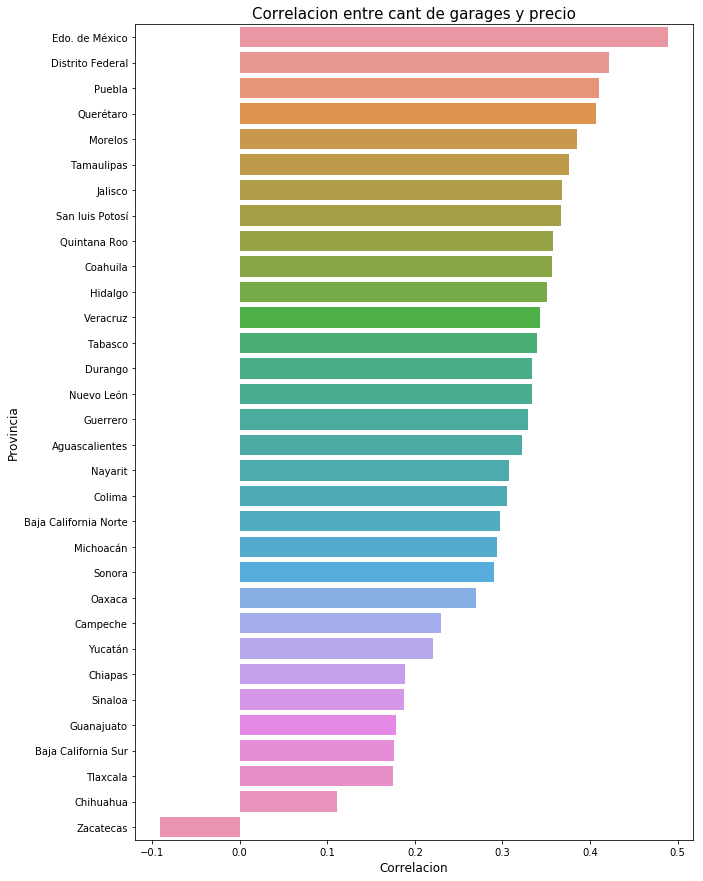

In [116]:
plt.figure(figsize=(10,15))
g = sns.barplot(x = df['precio'], y = df['provincia'])
g.set_title("Correlacion entre cant de garages y precio", fontsize=15)
g.set_xlabel("Correlacion", fontsize=12)
g.set_ylabel("Provincia", fontsize=12)

Si bien no es tanta la diferencia, si varia. Ademas las zonas mas pobladas quedaron efectivamente en puestos mas altos.

# Correlacion entre precio y garage por ciudad

In [117]:
df = data
df['n'] = 1
df = df.groupby(['ciudad']).filter(lambda x: x['n'].sum() >= 500)
df['ciudad'].value_counts()

Querétaro                12646
Benito Juárez            11014
Zapopan                  10360
San Luis Potosí           7925
Mérida                    7162
Monterrey                 6946
Alvaro Obregón            6633
Cuauhtémoc                6614
Naucalpan de Juárez       6554
Miguel Hidalgo            5795
Atizapán de Zaragoza      5783
Tlalpan                   5721
Huixquilucan              5718
Coyoacán                  5293
Puebla                    4636
Guadalajara               4006
San Andrés Cholula        3805
Cancún                    3779
Cuernavaca                3775
Chihuahua                 3757
Tlalnepantla de Baz       3588
Cuautitlán Izcalli        3408
Tlajomulco de Zúñiga      3254
Gustavo A. Madero         3141
Iztapalapa                3093
Cuajimalpa de Morelos     3020
Tijuana                   2863
Hermosillo                2590
Acapulco de Juárez        2454
Ecatepec de Morelos       2159
                         ...  
Tultitlán                 1029
San Pedr

In [118]:
df = df.dropna(subset = ['garages']).groupby(['ciudad'])['garages', 'precio'].corr().reset_index()
df = df[ df['level_1'] == 'garages']
df.sort_values(['precio'], ascending = False, inplace = True)
df

,ciudad,level_1,garages,precio
132,Temixco,garages,1.00,0.56
52,Emiliano Zapata,garages,1.00,0.54
80,León,garages,1.00,0.52
88,Miguel Hidalgo,garages,1.00,0.51
10,Atizapán de Zaragoza,garages,1.00,0.50
72,Jiutepec,garages,1.00,0.50
140,Tlajomulco de Zúñiga,garages,1.00,0.49
6,Alvaro Obregón,garages,1.00,0.49
38,Cuautitlán Izcalli,garages,1.00,0.49
30,Coyoacán,garages,1.00,0.47


Text(0, 0.5, 'ciudad')

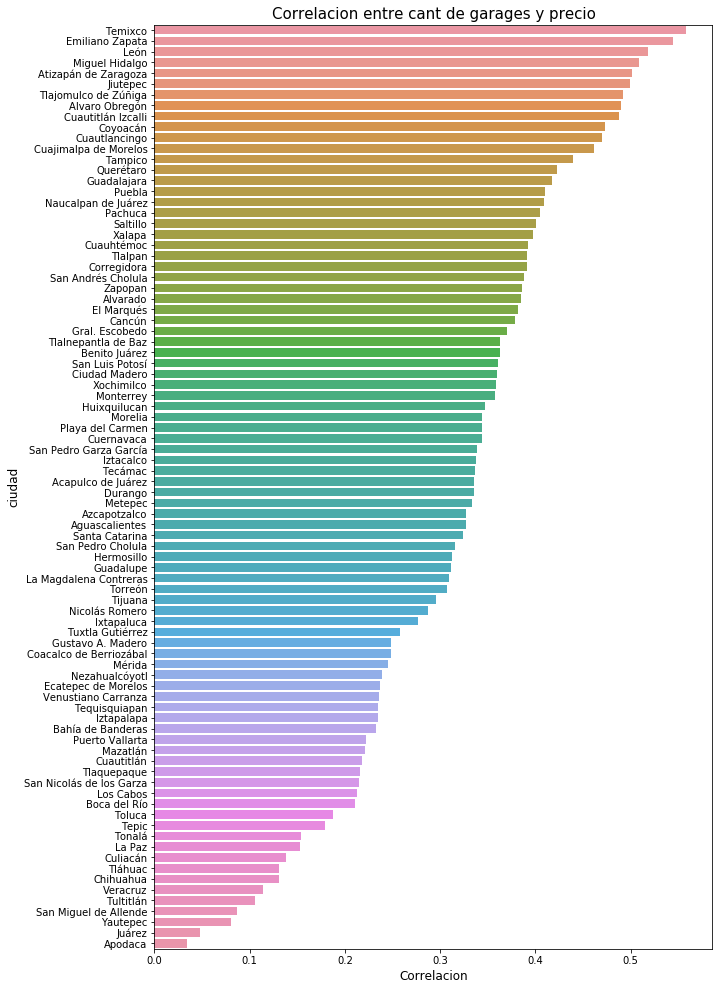

In [119]:
plt.figure(figsize=(10,17))
g = sns.barplot(x = df['precio'], y = df['ciudad'])
g.set_title("Correlacion entre cant de garages y precio", fontsize=15)
g.set_xlabel("Correlacion", fontsize=12)
g.set_ylabel("ciudad", fontsize=12)

Hay diferencias notables. Habra que ver si son las mas pobladas o no. Igual casi todas estan por debajo de 0.5.

# Distribucion de los usos multiples

In [120]:
data['usosmultiples'].value_counts()

0.00    226778
1.00     13222
Name: usosmultiples, dtype: int64

In [121]:
df = data.groupby(by = ['tipodepropiedad']).agg({'usosmultiples':'sum'}).reset_index()
df

,tipodepropiedad,usosmultiples
0,Apartamento,6187.00
1,Bodega comercial,0.00
2,Casa,5099.00
3,Casa en condominio,1907.00
4,Casa uso de suelo,0.00
5,Departamento Compartido,26.00
6,Duplex,0.00
7,Edificio,1.00
8,Garage,0.00
9,Hospedaje,0.00


Text(0, 0.5, 'Cantidad de usosmultiples')

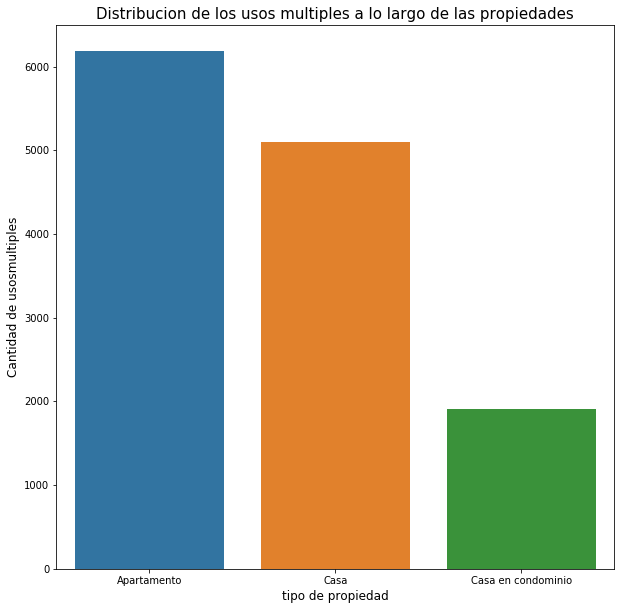

In [122]:
df = df[df['usosmultiples'] > 100]
plt.figure(figsize=(10,10))
g = sns.barplot(x = df['tipodepropiedad'], y = df['usosmultiples'])
g.set_title("Distribucion de los usos multiples a lo largo de las propiedades", fontsize=15)
g.set_xlabel("tipo de propiedad", fontsize=12)
g.set_ylabel("Cantidad de usosmultiples", fontsize=12)

El resto de las propiedades no poseen ningun uso multiple o es practicamente nulo. Los apartamentos salen ganando en este aspecto

# Distribucion de gimnasios

In [123]:
data['gimnasio'].value_counts()

0.00    225006
1.00     14994
Name: gimnasio, dtype: int64

In [124]:
df = data.groupby(by = ['tipodepropiedad']).agg({'gimnasio':'sum'}).reset_index()
df

,tipodepropiedad,gimnasio
0,Apartamento,7591.00
1,Bodega comercial,0.00
2,Casa,6105.00
3,Casa en condominio,1262.00
4,Casa uso de suelo,0.00
5,Departamento Compartido,34.00
6,Duplex,0.00
7,Edificio,0.00
8,Garage,0.00
9,Hospedaje,0.00


Text(0, 0.5, 'Cantidad de gimnasios')

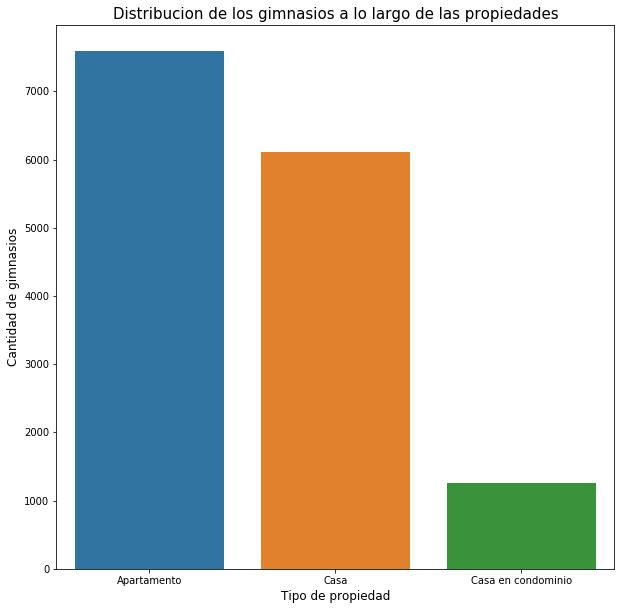

In [125]:
df = df[df['gimnasio'] > 100]
plt.figure(figsize=(10,10))
g = sns.barplot(x = df['tipodepropiedad'], y = df['gimnasio'])
g.set_title("Distribucion de los gimnasios a lo largo de las propiedades", fontsize=15)
g.set_xlabel("Tipo de propiedad", fontsize=12)
g.set_ylabel("Cantidad de gimnasios", fontsize=12)

Nuevamente los apartamentos toman la delantera

# Distribucion de piscinas

In [126]:
data['piscina'].value_counts()

0.00    219028
1.00     20972
Name: piscina, dtype: int64

In [127]:
df = data.groupby(by = ['tipodepropiedad']).agg({'piscina':'sum'}).reset_index()
df

,tipodepropiedad,piscina
0,Apartamento,8095.00
1,Bodega comercial,0.00
2,Casa,9109.00
3,Casa en condominio,2973.00
4,Casa uso de suelo,0.00
5,Departamento Compartido,26.00
6,Duplex,0.00
7,Edificio,1.00
8,Garage,0.00
9,Hospedaje,0.00


Text(0, 0.5, 'Cantidad de piscinas')

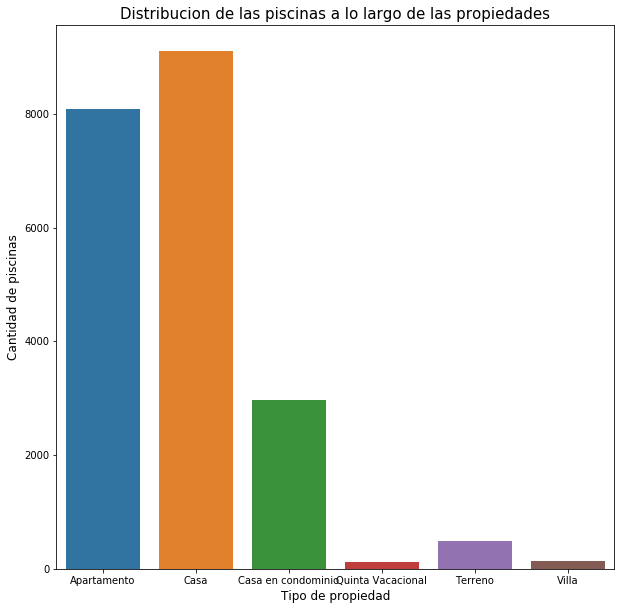

In [128]:
df = df[df['piscina'] > 100]
plt.figure(figsize=(10,10))
g = sns.barplot(x = df['tipodepropiedad'], y = df['piscina'])
g.set_title("Distribucion de las piscinas a lo largo de las propiedades", fontsize=15)
g.set_xlabel("Tipo de propiedad", fontsize=12)
g.set_ylabel("Cantidad de piscinas", fontsize=12)

En este apartado las casas triunfan. Además hay mas propiedades con una cantidad comparable de piscinas.

También se puede observar que cant_piscina > cant_gimnasios > cant_usos_multiples. Las piscinas son mas populares